In [1]:
import numpy as np
import pandas as pd
import glob
import os
import nilearn
from nilearn import plotting
from nilearn.plotting import plot_design_matrix, plot_stat_map
from nilearn.glm.first_level import make_first_level_design_matrix

In [2]:
file_pattern = os.path.join('func', 'run*', 'events.tsv')

tsv_files = glob.glob(file_pattern)

combined_df = pd.DataFrame()

for file in tsv_files:
    df = pd.read_csv(file, sep='\t')
    combined_df = pd.concat([combined_df, df], ignore_index=True)

events = combined_df[['onset', 'duration']]
events.head(10)

,onset,duration
0,6.0,3.5
1,10.5,3.5
2,17.5,3.5
3,24.0,3.5
4,29.5,3.5
5,35.5,3.5
6,42.0,3.5
7,48.0,3.5
8,54.0,3.5
9,60.5,3.5


In [ ]:
total_scan_time = 330
tr = 2.0 
# n_scans = int(total_scan_time / tr)
n_scans = 171
print(n_scans)


165


In [ ]:
frame_times = np.arange(n_scans) * tr  # here are the corresponding frame times

design_matrix = make_first_level_design_matrix(
    frame_times=frame_times,
    events=events,
    hrf_model='spm'
)

design_matrix.head()

/usr/local/python/3.12.1/lib/python3.12/site-packages/nilearn/glm/first_level/experimental_paradigm.py:129: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
/usr/local/python/3.12.1/lib/python3.12/site-packages/nilearn/glm/first_level/experimental_paradigm.py:198: UserWarning: Duplicated events were detected. Amplitudes of these events will be summed. You might want to verify your inputs.
  warnings.warn(


,dummy,drift_1,drift_2,drift_3,drift_4,drift_5,drift_6,constant
0.0,0.000000,0.110091,0.110076,0.110051,0.110017,0.109972,0.109917,1.0
2.0,0.000000,0.110051,0.109917,0.109693,0.109379,0.108976,0.108484,1.0
4.0,0.000000,0.109972,0.109598,0.108976,0.108107,0.106993,0.105637,1.0
6.0,0.000000,0.109852,0.109120,0.107904,0.106208,0.104041,0.101412,1.0
8.0,0.076521,0.109693,0.108484,0.106479,0.103694,0.100147,0.095866,1.0


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
motion = np.cumsum(np.random.randn(n_scans, 6), 0)
add_reg_names = ["tx", "ty", "tz", "rx", "ry", "rz"]

hrf_model = "glover"
X1 = make_first_level_design_matrix(
    frame_times,
    events,
    drift_model="polynomial",
    drift_order=3,
    add_regs=motion,
    add_reg_names=add_reg_names,
    hrf_model=hrf_model,
)
X2 = make_first_level_design_matrix(
    frame_times,
    events,
    drift_model="polynomial",
    drift_order=3,
    hrf_model=hrf_model,
)
hrf_model = "FIR"
X3 = make_first_level_design_matrix(
    frame_times,
    events,
    hrf_model="fir",
    drift_model="polynomial",
    drift_order=3,
    fir_delays=np.arange(1, 6),
)

/usr/local/python/3.12.1/lib/python3.12/site-packages/nilearn/glm/first_level/experimental_paradigm.py:129: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
/usr/local/python/3.12.1/lib/python3.12/site-packages/nilearn/glm/first_level/experimental_paradigm.py:198: UserWarning: Duplicated events were detected. Amplitudes of these events will be summed. You might want to verify your inputs.
  warnings.warn(
/usr/local/python/3.12.1/lib/python3.12/site-packages/nilearn/glm/first_level/experimental_paradigm.py:129: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
/usr/local/python/3.12.1/lib/python3.12/site-packages/nilearn/glm/first_level/experimental_paradigm.py:198: UserWarning: Duplicated events were detected. Amplitudes of these events will be summed. You might want to verify your inputs.
  warnings.warn(
/usr/local/python/3.12.1/lib/python3.12/site-packages/nilearn/glm/first_level/experimental_paradigm.py:129: 

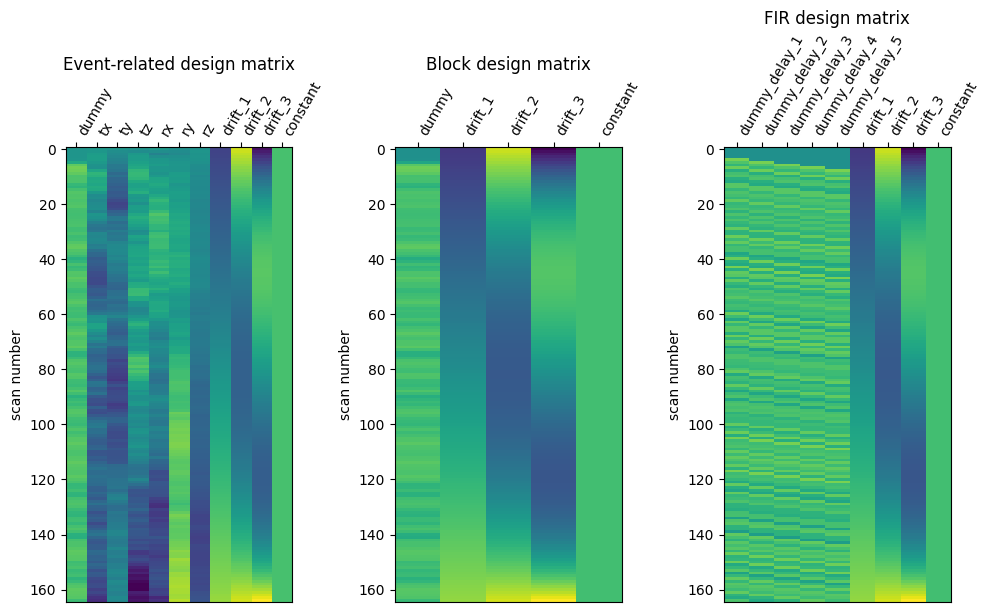

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(10, 6), nrows=1, ncols=3)
plot_design_matrix(X1, ax=ax1)
ax1.set_title("Event-related design matrix", fontsize=12)
plot_design_matrix(X2, ax=ax2)
ax2.set_title("Block design matrix", fontsize=12)
plot_design_matrix(X3, ax=ax3)
ax3.set_title("FIR design matrix", fontsize=12)
fig.show()

/usr/local/python/3.12.1/lib/python3.12/site-packages/nilearn/glm/first_level/experimental_paradigm.py:129: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
/usr/local/python/3.12.1/lib/python3.12/site-packages/nilearn/glm/first_level/experimental_paradigm.py:198: UserWarning: Duplicated events were detected. Amplitudes of these events will be summed. You might want to verify your inputs.
  warnings.warn(
/usr/local/python/3.12.1/lib/python3.12/site-packages/nilearn/glm/first_level/experimental_paradigm.py:129: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
/usr/local/python/3.12.1/lib/python3.12/site-packages/nilearn/glm/first_level/experimental_paradigm.py:198: UserWarning: Duplicated events were detected. Amplitudes of these events will be summed. You might want to verify your inputs.
  warnings.warn(
/usr/local/python/3.12.1/lib/python3.12/site-packages/nilearn/glm/first_level/experimental_paradigm.py:129: 

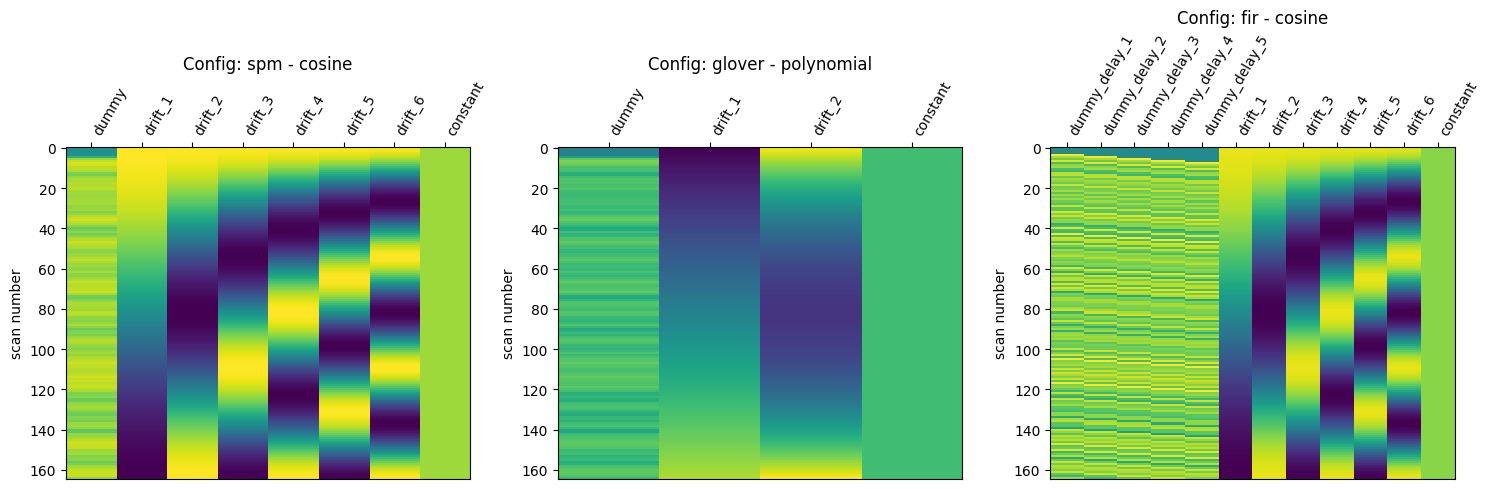

In [ ]:
configurations = [
    {'hrf_model': 'spm', 'drift_model': 'cosine'},
    {'hrf_model': 'glover', 'drift_model': 'polynomial', 'drift_order': 2},
    {'hrf_model': 'fir', 'fir_delays': np.arange(1, 6), 'drift_model': 'cosine'},
]

fig, axes = plt.subplots(figsize=(15, 5), nrows=1, ncols=3)

for idx, config in enumerate(configurations):
    design_matrix = make_first_level_design_matrix(
        frame_times=frame_times,
        events=events,
        **config
    )
    
    plot_design_matrix(design_matrix, ax=axes[idx])
    axes[idx].set_title(f"Config: {config['hrf_model']} - {config.get('drift_model', 'None')}")

plt.tight_layout()
plt.show()
